# Easily export jupyter cells to python module
https://github.com/fastai/course-v3/blob/master/nbs/dl2/notebook2script.py

In [3]:
! python /tf/src/scripts/notebook2script.py evaluation.ipynb

Converted evaluation.ipynb to exp/nb_evaluation.py


In [2]:
! pip install fire

     |████████████████████████████████| 81kB 1.5MB/s eta 0:00:011
  Stored in directory: /root/.cache/pip/wheels/31/9c/c0/07b6dc7faf1844bb4688f46b569efe6cafaa2179c95db821da
Successfully built fire
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
#export
from exp.nb_clustering import *
from sklearn.neighbors.kde import KernelDensity
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [2]:
cd /tf/src/data/features

/tf/src/data/features


# Using Gaussian Mixtures for KL-Divergence

## Read in Feature Vectors

In [49]:
models_path = "/tf/src/data/features/output_space"
models_features = load_features(models_path)

In [123]:
features_1 = reduce_dims(list(models_features[0].values())[:100], 2)
features_2 = reduce_dims(list(models_features[1].values())[:100], 2)

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.040752
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.868446
[t-SNE] KL divergence after 300 iterations: 1.021564
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 5.540577
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.823608
[t-SNE] KL divergence after 300 iterations: 0.968753


In [127]:
features_1.shape, features_2.shape

((100, 2), (100, 2))

In [ ]:
#export
# Generate Mixed Gaussian Model with k components
def generate_distributions(feature_vectors, k):
    gmm = GaussianMixture(k, covariance_type="diag")
    gmm.fit(feature_vectors)
    
    return gmm

In [125]:
#export
# From https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms
def gmm_kl(gmm_p, gmm_q, n_samples=10**5):
    X, _ = gmm_p.sample(n_samples) # Uses monte-carlo sampling
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    return log_p_X.mean() - log_q_X.mean()

In [126]:
gmm_p = generate_distributions(features_1, 2)
gmm_q = generate_distributions(features_2, 2)

kl = gmm_kl(gmm_p, gmm_q)
kl

0.12307947539021491

## Visualize in 1d

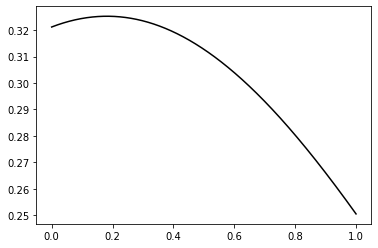

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(0, 1, 1000).reshape(1000,1)
logprob = gmm_q.score_samples(x)
pdf = np.exp(logprob)
#print np.max(pdf) -> 19.8409464401 !?
ax.plot(x, pdf, '-k')
plt.show()

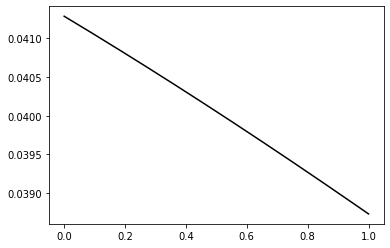

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(0, 1, 1000).reshape(1000,1)
logprob = gmm_p.score_samples(x)
pdf = np.exp(logprob)
#print np.max(pdf) -> 19.8409464401 !?
ax.plot(x, pdf, '-k')
plt.show()

## Visualize in 2d

## Visualize in 3d